In [1]:
#Importing needed libraries

import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Storing the data into the dataframe

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#Printing its first 5 rows of the dataset

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#Printing last 5 rows of the dataset

df.tail()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
#Printing any of the row as a sample from the dataset

df.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1109,M,0.52,0.4,0.145,0.7765,0.3525,0.1845,0.185,9


In [6]:
#Printing the shape of the dataset

df.shape

(4177, 9)

In [7]:
#Only two variables are different i.e. sex (object type) & rings (integer type)

df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
#Showing all the columns that are presented into the dataset 

df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
#Checking skewnes of the data so that we get an idea to remove it

df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [10]:
#Getting the information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
#Checking is there any null value present in all the presented columns 
#There are no null values as it is showing 0 in all the columns

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

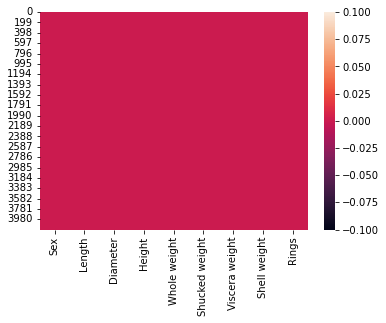

In [12]:
#Plotting heatmap showing there are no null values

sns.heatmap(df.isnull())

# STATISTICAL SUMMARY

In [13]:
#Showing the statistical summary of the dataset

df.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
#Showing 

df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [15]:
df.Rings.nunique()

28

# UNIVARIET ANALYSIS

<AxesSubplot:xlabel='Rings', ylabel='count'>

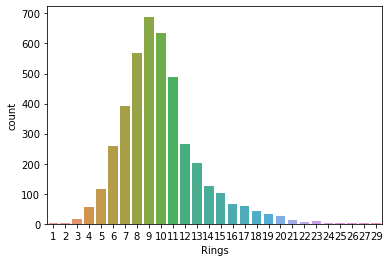

In [16]:
#Showing countplot through seaborn
#It is slighted towards right
#From 7 to 12 we see that most numbers of counts occured there

sns.countplot(x='Rings',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Whole weight'>

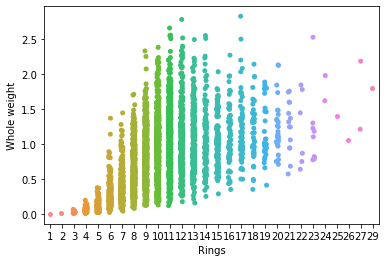

In [17]:
#As we can see with the help of stripplot that rings are increasing as whole weight.
#They shows +ve relationship amoung each other

sns.stripplot(data=df,x='Rings',y='Whole weight')

<AxesSubplot:xlabel='Rings', ylabel='Density'>

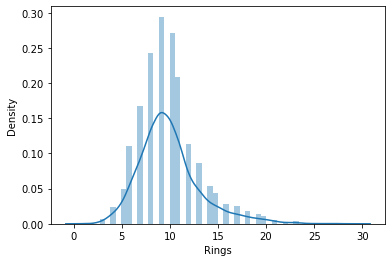

In [18]:
#Showing distribution plot of rings to check that how is the curve distributed

sns.distplot(df['Rings'])

<AxesSubplot:xlabel='Rings'>

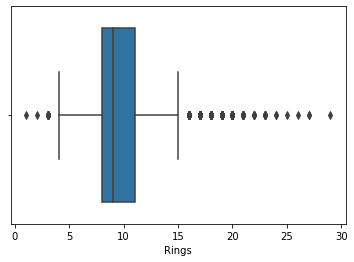

In [19]:
#Showing boxplot & as we can see there are so many points are there outside the boxplot 
#Stats that there are outliers in our target column

sns.boxplot(df['Rings'])

<AxesSubplot:xlabel='Rings'>

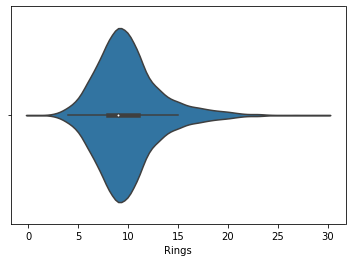

In [20]:
#Showing violinplot of our target variable
#Intensity is high b/w 6 to 13 approximately

sns.violinplot(df['Rings'])

<AxesSubplot:xlabel='Rings', ylabel='Count'>

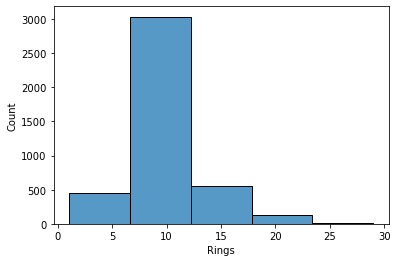

In [21]:
#Plotting histogram

sns.histplot(df['Rings'],bins=5)


# CONVERTING SEX COLUMN INTO INTEGER FORMAT

In [22]:
#Converting the sex column into integer format as we now need to do bi b=variet analysis
#Importing LabelEncoder for converting the column into integer format

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# BI-VARIET ANALYSIS

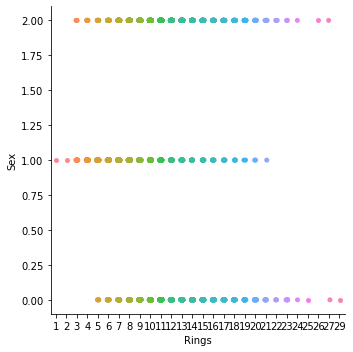

In [23]:
#Plotting catplot

sns.catplot(x='Rings',y='Sex',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

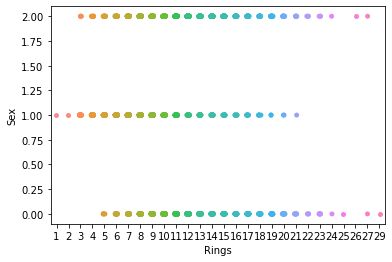

In [24]:
#Plotting stripplot

sns.stripplot(x='Rings',y='Sex',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

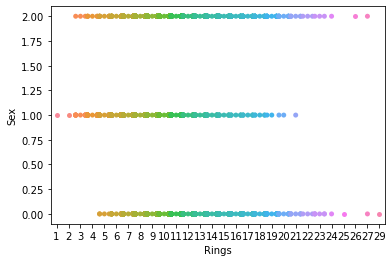

In [25]:
#Plotting swarmplot

sns.swarmplot(x='Rings',y='Sex',data=df)

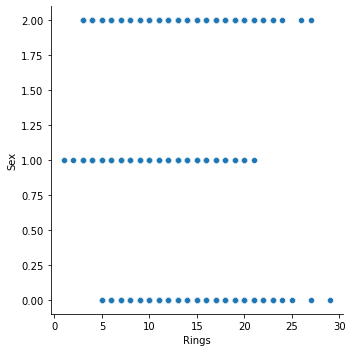

In [26]:
#Ploting relplot

sns.relplot(x='Rings',y='Sex',data=df)

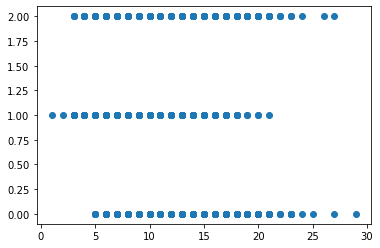

In [27]:
#Ploting scatter plot

plt.scatter(df['Rings'],df['Sex'])
plt.show()

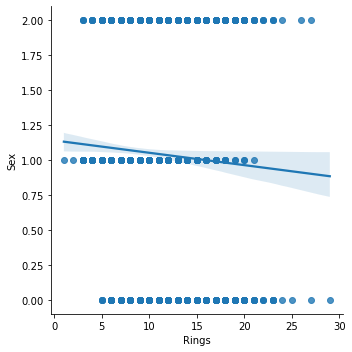

In [28]:
#Ploting lm plot

sns.lmplot('Rings','Sex',data=df)

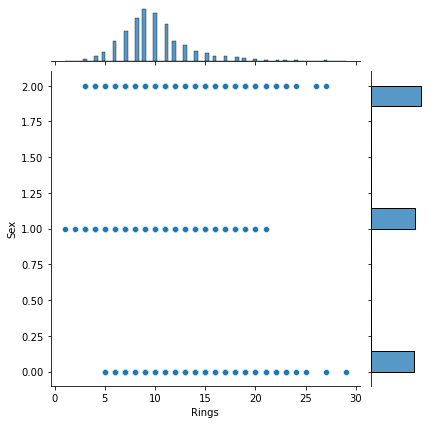

In [29]:
#Plotting Jointplot

sns.jointplot(x='Rings',y='Sex',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

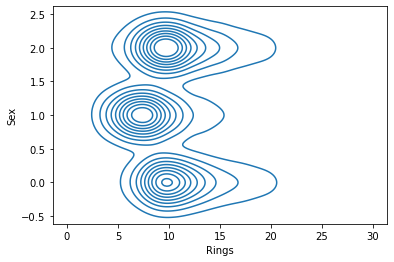

In [30]:
#Ploting kde plot

sns.kdeplot(x='Rings',y='Sex',data=df)

# MULTIVARIET ANALYSIS

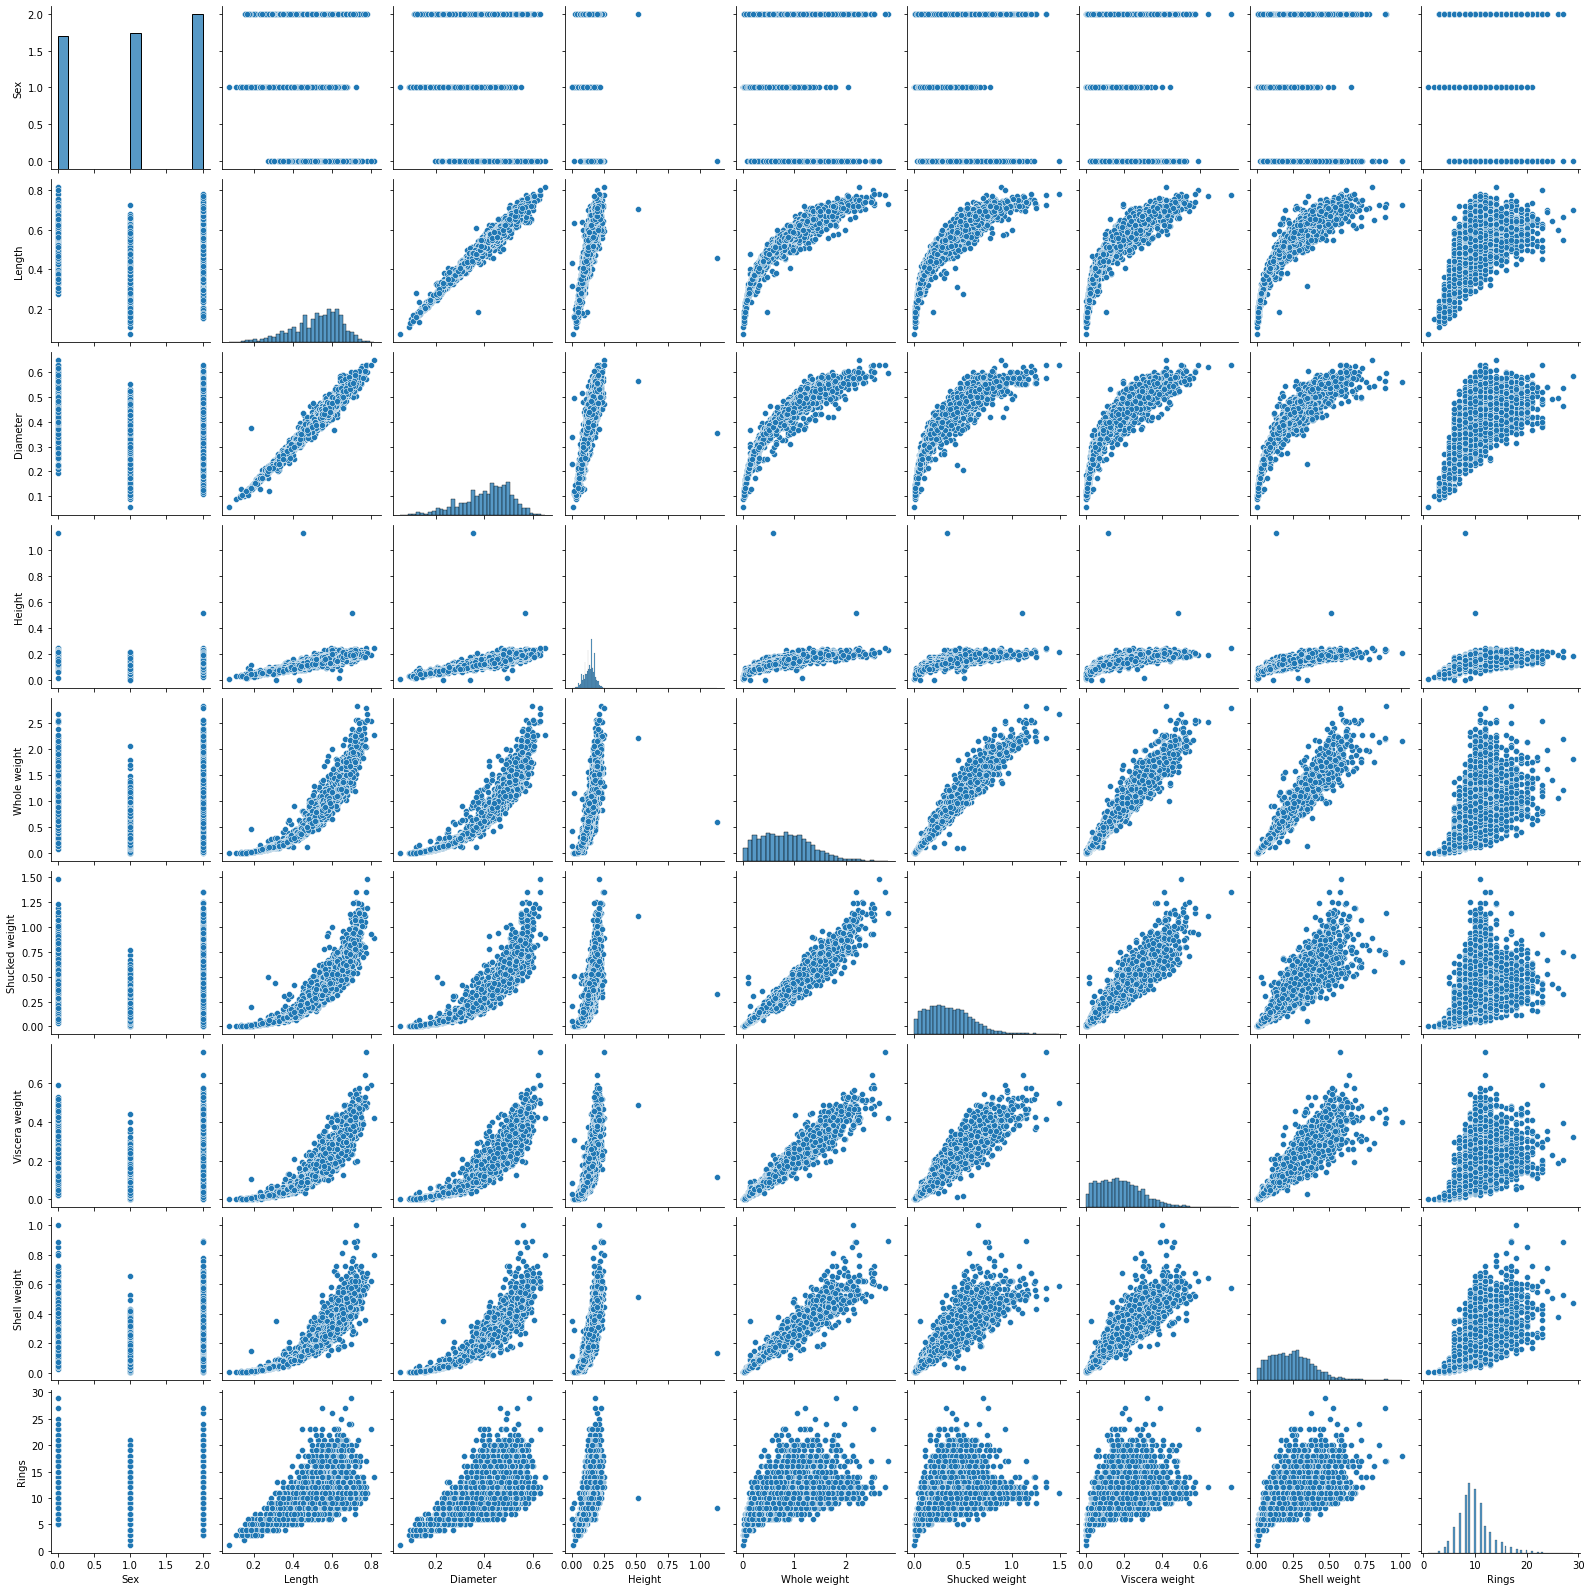

In [31]:
#Plotting all the variables in respect to all the variable to determine each relationships b/w the variables 

sns.pairplot(df)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

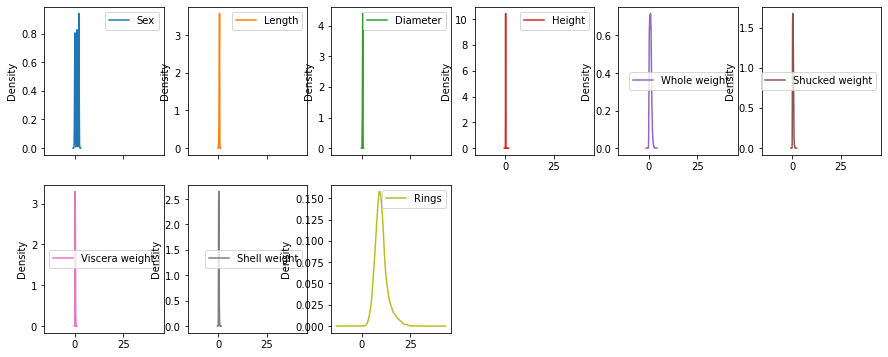

In [32]:
#Determining the skewness present in all the columns

df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

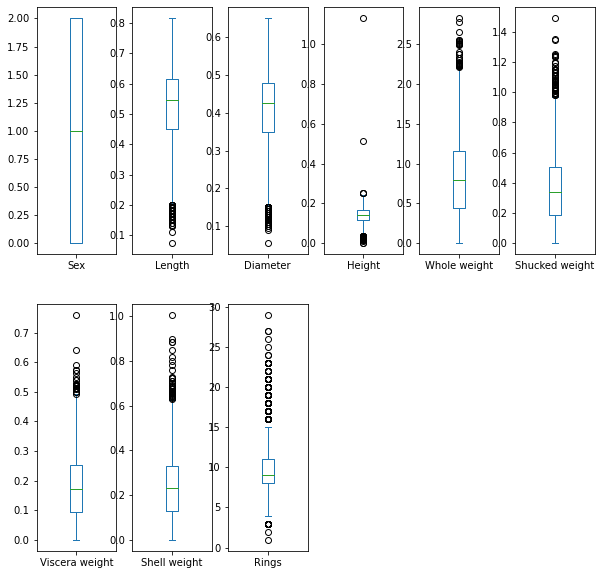

In [33]:
#Showing boxplots of all the variables

df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

# CO-RELATION

In [34]:
#Determining the corelations b/w the columns storing it into the dfcor name variable & printing it

dfcor=df.corr()
dfcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

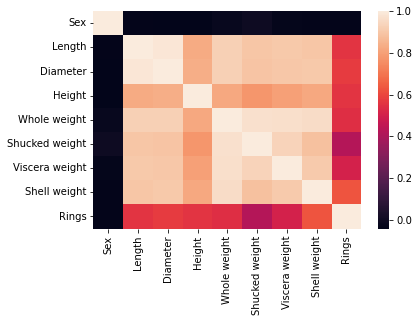

In [35]:
#Ploting heatmap of the corelation for better understanding
#Showing corelation through heatmap
#Here lighter colors are HIGHLY CORELATED

sns.heatmap(dfcor)

<AxesSubplot:>

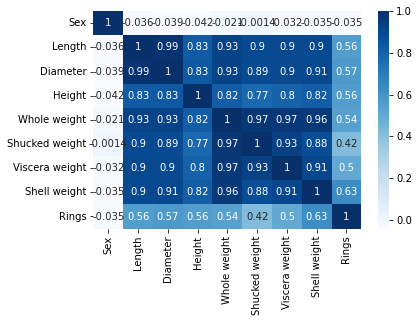

In [36]:
#Showing corelation through heatmap & also printing values for better understanding
#Here all the DARK COLUMNS are HIGHLY CORELATED

sns.heatmap(dfcor,annot=True,cmap='Blues')

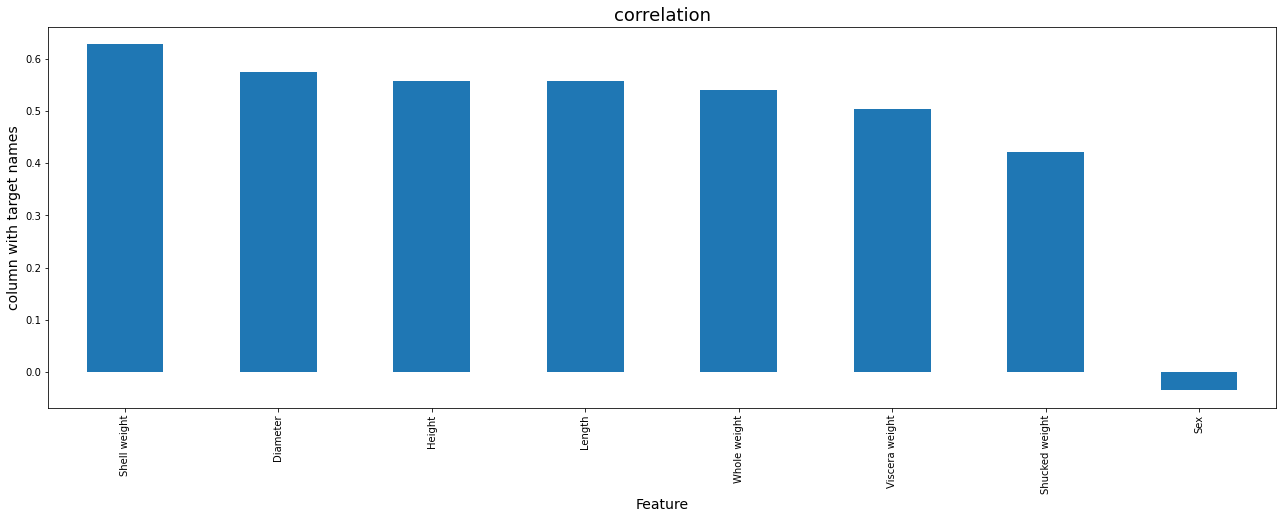

In [37]:
#Showing all the columns  positively & negatively corelated

plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# PLOTTING OUTLIERS

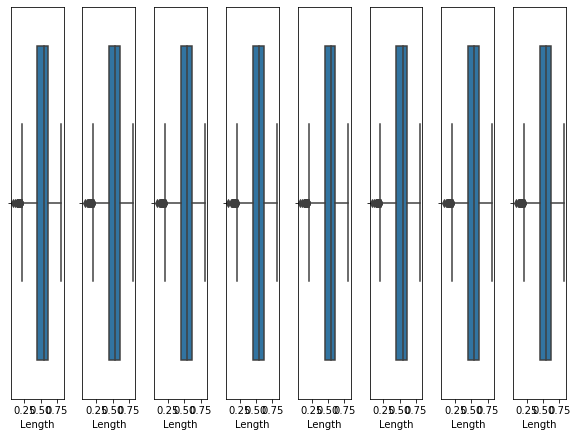

In [38]:
#Defining the no of rows & columns in one-one variable
#Differntiating the columns by names & storing it into collist
#Ploting box plot for ploting outliers

ncol=12
nrows=10
collist=df.columns.values

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[1]],orient='v')
    plt.tight_layout()

# PLOTING SKEWNESS

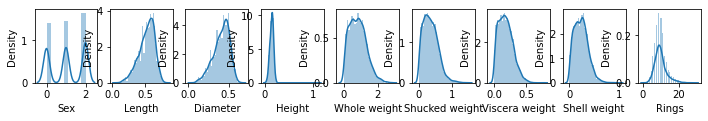

In [39]:
#Ploting skewness

plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

# REMOVING OUTLIERS

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [41]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [42]:
df_new.shape

(4027, 9)

In [43]:
df.shape

(4177, 9)

In [44]:
data_loss=((200-198)/200)*100
data_loss

1.0

In [45]:
x=df_new.drop("Rings",axis=1)
y=df_new["Rings"]
print(x.shape)
print(y.shape)

(4027, 8)
(4027,)


In [46]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [47]:
df_new.skew()

Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
dtype: float64

now skewness has been remove using power transform

Lets perform standardization:

In [48]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
m.fit_transform(df_new)

array([[1.        , 0.32587672, 0.35159472, ..., 0.3213402 , 0.29566722,
        0.30234124],
       [1.        , 0.1798726 , 0.17972166, ..., 0.1499004 , 0.14998212,
        0.14383372],
       [0.        , 0.45400254, 0.46792148, ..., 0.36098407, 0.39680716,
        0.40983173],
       ...,
       [1.        , 0.59399609, 0.60192475, ..., 0.6423811 , 0.69730051,
        0.56780466],
       [0.        , 0.64918964, 0.62833268, ..., 0.64733347, 0.64912689,
        0.54951688],
       [1.        , 0.8591506 , 0.83227385, ..., 0.95670355, 0.84245984,
        0.82119212]])

In [49]:
x=df_new

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [51]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Ln=LinearRegression()
    Ln.fit(x_train,y_train)
    pred=Ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.5680284621683096  at Random State  172


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [53]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc)
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of LinearRegression() is: 0.5680284621683096
mean_absolute_error: 1.507689156492309
mean_squared_error: 3.9201831318316267
Root mean_squared_error: 1.9799452345536295


Accuracy Score of DecisionTreeRegressor() is: 0.18067159256308485
mean_absolute_error: 2.003722084367246
mean_squared_error: 7.435483870967742
Root mean_squared_error: 2.7268083671148844


Accuracy Score of RandomForestRegressor() is: 0.583343738157299
mean_absolute_error: 1.4327047146401986
mean_squared_error: 3.7811955334987597
Root mean_squared_error: 1.9445296432553452


Accuracy Score of AdaBoostRegressor() is: 0.4280185502813635
mean_absolute_error: 1.8938619146583648
mean_squared_error: 5.190786509136299
Root mean_squared_error: 2.2783297630361368




# Cross Validation Model:

In [54]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LinearRegression() is:  0.4231197726508821
Score for DecisionTreeRegressor() is:  -0.05122577322818693
Score for RandomForestRegressor() is:  0.4569508240895819
Score for AdaBoostRegressor() is:  0.205774978012305


With RandomForest model there is very less difference in accuracy and cross validation score, Hence the best model is AdaBoostRegressor.

# Hyper Parameter Training:

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameters={'n_estimators': [50, 100],
'min_samples_split':[1,2,3,4,5,6],
'max_depth':[1,2,3,4,5,6,7,8,9,10],
'max_features':['sqrt', 'log2']}

In [57]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [58]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [50, 100]})

In [59]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 6,
 'n_estimators': 100}

In [60]:
Final_mod= AdaBoostRegressor(learning_rate=1,loss="exponential",n_estimators=100,random_state=0)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

14.681078757340593


After performing GridSearchCV method accuarcy is 14.68%

# saving the best model:

In [61]:
import pickle
filename= 'abalone_prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [62]:
#load the model from the disk

loaded_model = pickle.load(open('abalone_prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.14681078757340593


In [63]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,796,797,798,799,800,801,802,803,804,805
Predicted,6.684211,10.609148,13.435989,12.347707,13.224404,12.107121,13.408142,11.468421,11.559075,11.925968,...,13.271372,13.297257,13.399658,7.992157,13.137217,11.016949,13.271372,8.615942,8.423823,13.096371
Orginal,6.684211,10.609148,13.435989,12.347707,13.224404,12.107121,13.408142,11.468421,11.559075,11.925968,...,13.271372,13.297257,13.399658,7.992157,13.137217,11.016949,13.271372,8.615942,8.423823,13.096371
